In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')
cwd = os.getcwd()
print(cwd)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
df_howpop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/howpop_train.csv')
df_howpop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

In [ ]:
df_howpop.head()

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356


Определяем количество нулеввых строк, определяем процентное соотношение нулевых строк к объему заполненых строк.

In [ ]:
total_rows = len(df_howpop)
nan_counts = df_howpop.isna().sum()
print(nan_counts)

print('')

nan_percentage = (nan_counts / total_rows) * 100
print(nan_percentage)

url                 0
domain              0
post_id             0
published           0
author              0
flow                0
polling             0
content_len         0
title               0
comments            0
favs                0
views               0
votes_plus          0
votes_minus         0
views_lognorm       0
favs_lognorm        0
comments_lognorm    0
dtype: int64

url                 0.0
domain              0.0
post_id             0.0
published           0.0
author              0.0
flow                0.0
polling             0.0
content_len         0.0
title               0.0
comments            0.0
favs                0.0
views               0.0
votes_plus          0.0
votes_minus         0.0
views_lognorm       0.0
favs_lognorm        0.0
comments_lognorm    0.0
dtype: float64


Удаляем нулевые строки 'votes_plus' и 'votes_minus'. Так как их количество мало и сильно не отразится на анализе данных. А строки author и flow с значениями Nan, я заменил на Not specified.  

In [ ]:
df_howpop = df_howpop.dropna(subset=['votes_plus'])
df_howpop = df_howpop.dropna(subset=['votes_minus'])

df_howpop = df_howpop.fillna('Not specified')

Удалим записи в которых сумма лайков и дизлайков больше просмотров.

Нормализуем данные в столюце content_len методом RobustScaler.

<Axes: title={'center': 'Нормализация методом RobustScaler'}, xlabel='content_len', ylabel='Density'>

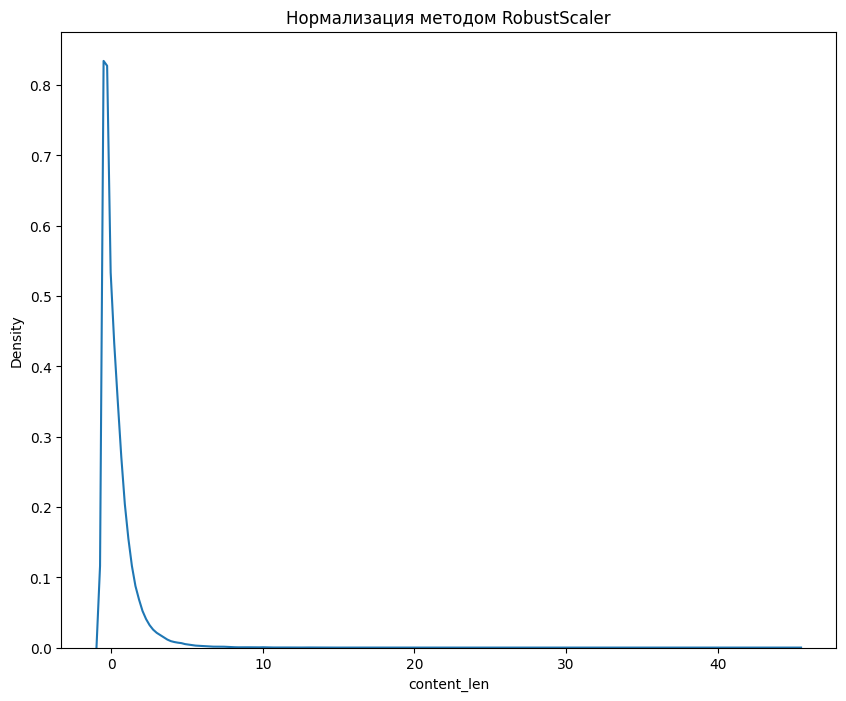

In [ ]:
from sklearn import preprocessing

r_scaler = preprocessing.RobustScaler()

df_r = r_scaler.fit_transform(df_howpop['content_len'].values.reshape(-1, 1))

df_r = pd.DataFrame(df_r, columns=['content_len'])

df_howpop['content_len'] = df_r['content_len']

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Нормализация методом RobustScaler')

sns.kdeplot(df_r['content_len'], ax=ax1)
